<a href="https://colab.research.google.com/github/NguyenHNhan/pyvista_3D/blob/main/Ontap3D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cài đặt và khởi tạo đối tượng IT với Pixel Art để được kết quả bên dưới:

In [ ]:
!apt-get install -qq xvfb libgl1-mesa-glx
!pip install pyvista -qq

Selecting previously unselected package libfontenc1:amd64.
(Reading database ... 123069 files and directories currently installed.)
Preparing to unpack .../0-libfontenc1_1%3a1.1.4-0ubuntu1_amd64.deb ...
Unpacking libfontenc1:amd64 (1:1.1.4-0ubuntu1) ...
Selecting previously unselected package libgl1-mesa-glx:amd64.
Preparing to unpack .../1-libgl1-mesa-glx_21.2.6-0ubuntu0.1~20.04.2_amd64.deb ...
Unpacking libgl1-mesa-glx:amd64 (21.2.6-0ubuntu0.1~20.04.2) ...
Selecting previously unselected package libxfont2:amd64.
Preparing to unpack .../2-libxfont2_1%3a2.0.3-1_amd64.deb ...
Unpacking libxfont2:amd64 (1:2.0.3-1) ...
Selecting previously unselected package libxkbfile1:amd64.
Preparing to unpack .../3-libxkbfile1_1%3a1.1.0-1_amd64.deb ...
Unpacking libxkbfile1:amd64 (1:1.1.0-1) ...
Selecting previously unselected package x11-xkb-utils.
Preparing to unpack .../4-x11-xkb-utils_7.7+5_amd64.deb ...
Unpacking x11-xkb-utils (7.7+5) ...
Selecting previously unselected package xfonts-encodings.


In [ ]:
import pyvista
pyvista.global_theme.jupyter_backend = 'static'
pyvista.global_theme.notebook = True
pyvista.start_xvfb()

In [ ]:
import pyvista as pv
from pyvista.demos import logo

In [ ]:
alien_str = """
    %   % % % % %
    %       %
    %       %
    %       %
"""

alien = []
for line in alien_str.splitlines()[1:]:
    if not line:
        continue
    if len(line) < 20:
        line += (20 - len(line)) * ' '
    alien.append([line[i : i + 2] == '% ' for i in range(0, len(line), 2)])

In [ ]:
def draw_pixels(plotter, pixels, center, color):
    bounds = [
        center[0] - 1.0,
        center[0] + 1.0,
        center[1] - 1.0,
        center[1] + 1.0,
        -10.0,
        +10.0,
    ]
    for rows in pixels:
        for pixel in rows:
            if pixel:
                box = pv.Box(bounds=bounds)
                plotter.add_mesh(box, color=color)
            bounds[0] += 2.0
            bounds[1] += 2.0
        bounds[0] = center[0] - 1.0
        bounds[1] = center[0] + 1.0
        bounds[2] += -2.0
        bounds[3] += -2.0
    return plotter

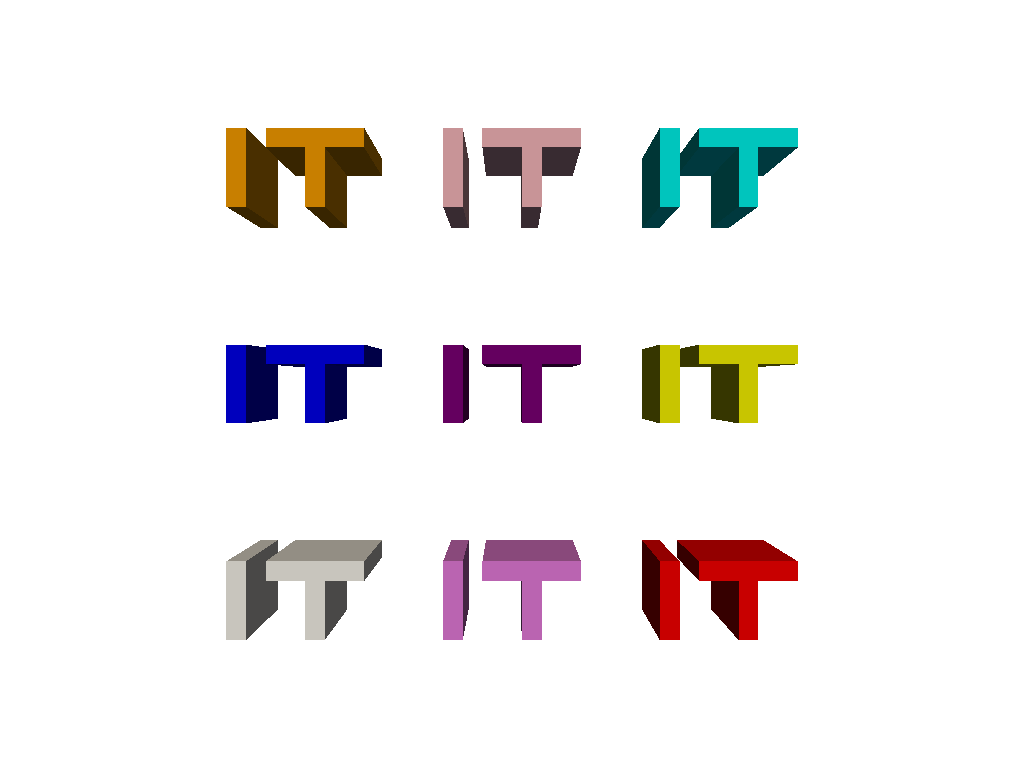

In [ ]:
p = pv.Plotter()
p = draw_pixels(p, alien, [-22.0, 22.0], "orange")
p = draw_pixels(p, alien, [0.0, 22.0], "pink")
p = draw_pixels(p, alien, [22.0, 22.0], "cyan")
p = draw_pixels(p, alien, [-22.0, 0.0], "blue")
p = draw_pixels(p, alien, [0.0, 0.0], "purple")
p = draw_pixels(p, alien, [22.0, 0.0], "yellow")
p = draw_pixels(p, alien, [-22.0, -22.0], "white")
p = draw_pixels(p, alien, [0.0, -22.0], "violet")
p = draw_pixels(p, alien, [22.0, -22.0], "red")
p.show(cpos="xy")

Lưới phi cấu trúc

In [ ]:
from pyvista import CellType
import numpy as np

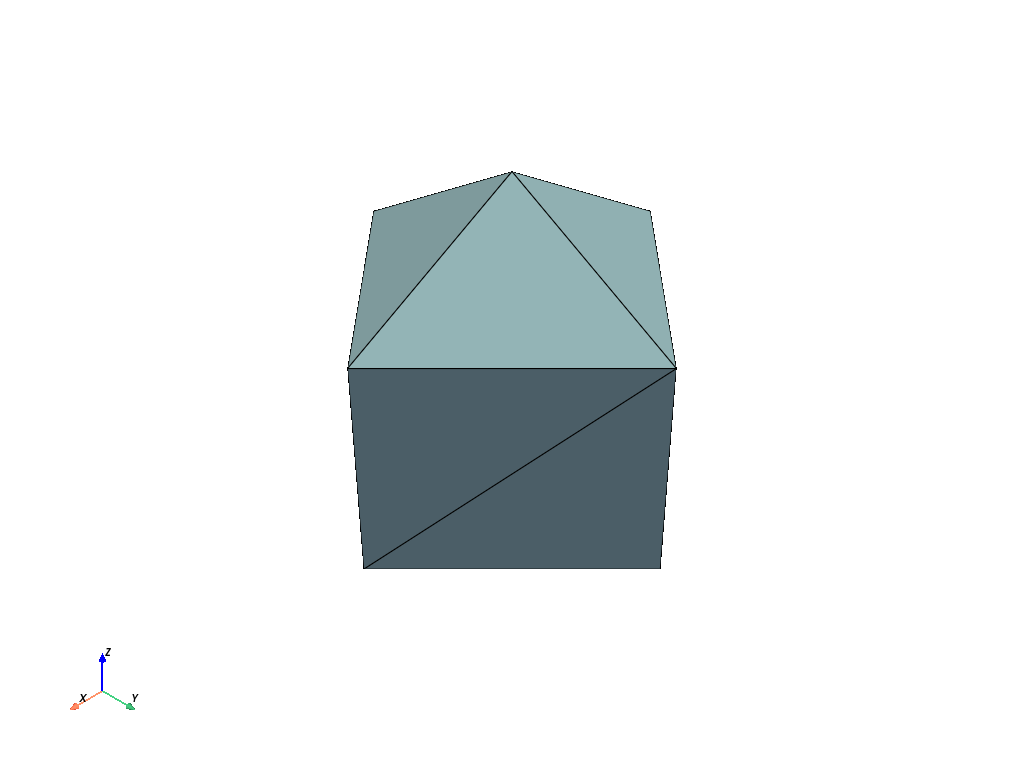

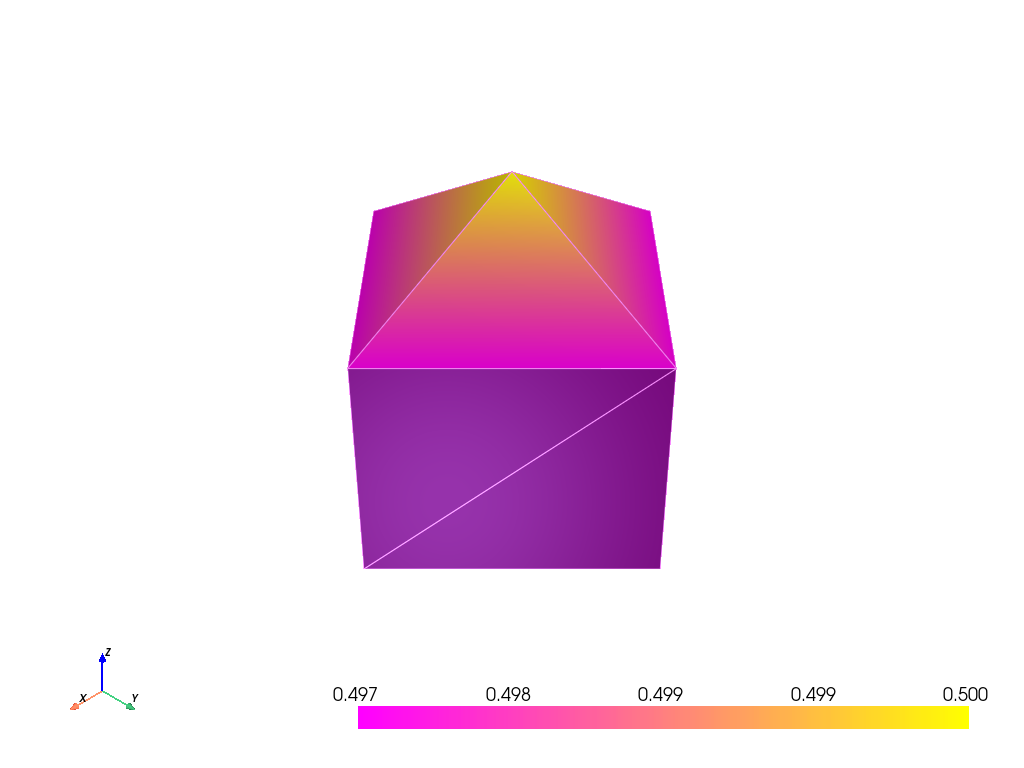

In [ ]:
cells = np.array(
    [
        [4, 6, 5, 8, 7],
        [4, 7, 3, 8, 9],
        [4, 7, 3, 1, 5],
        [4, 9, 3, 1, 7],
        [4, 2, 6, 5, 8],
        [4, 2, 6, 0, 4],
        [4, 6, 2, 0, 8],
        [4, 5, 2, 8, 3],
        [4, 5, 3, 8, 7],
        [4, 2, 6, 4, 5],
    ]
)
celltypes = np.full(10, fill_value=CellType.TETRA, dtype=np.uint8, )
points = np.array(
    [
        [-0.0, 0.0, -0.5],
        [0.0, 0.0, 0.5],
        [-0.43, 0.0, -0.25],
        [-0.43, 0.0, 0.25],
        [-0.0, 0.43, -0.25],
        [0.0, 0.43, 0.25],
        [0.43, 0.0, -0.25],
        [0.43, 0.0, 0.25],
        [0.0, -0.43, -0.25],
        [0.0, -0.43, 0.25],
    ]
)
grid = pv.UnstructuredGrid(cells, celltypes, points)
grid.plot(show_edges=True)
grid.plot(show_edges=True, scalars= points, specular= 1, cmap="spring", edge_color="violet")

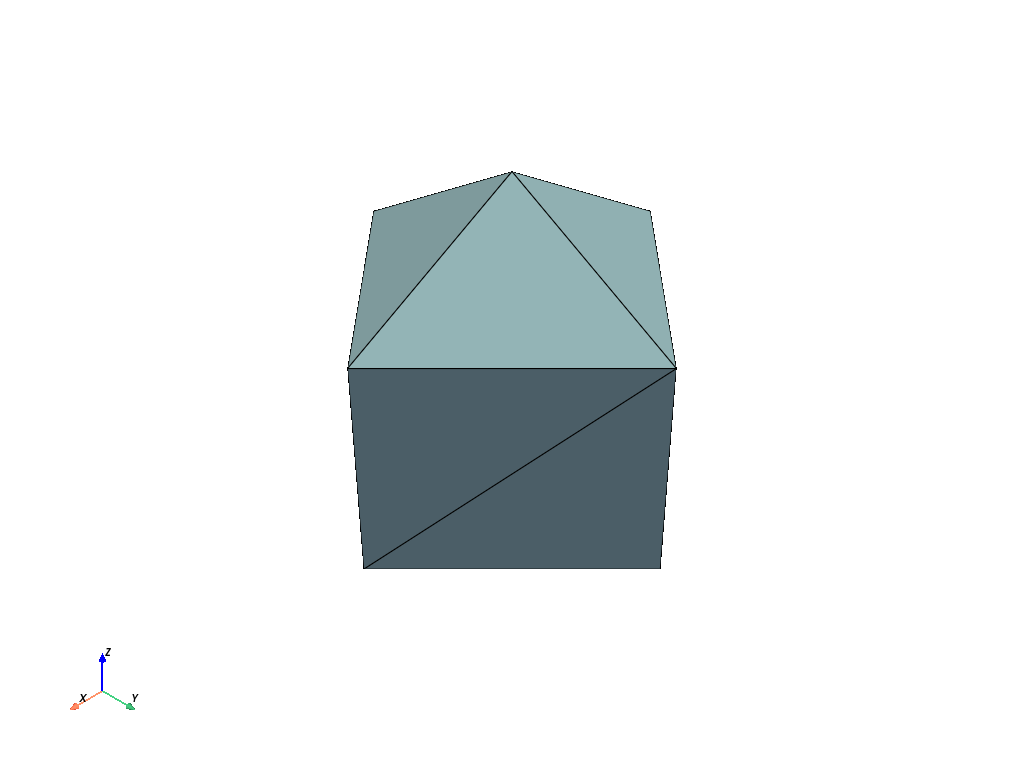

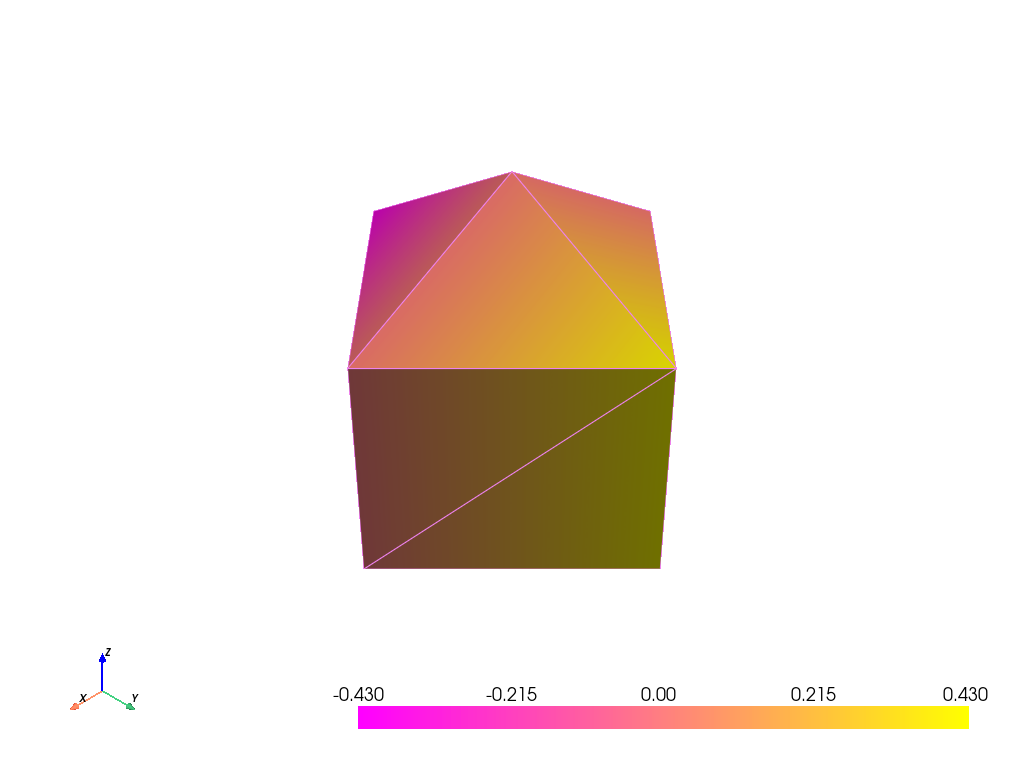

In [ ]:
import numpy as np
import pyvista as pv
import matplotlib.pyplot as plt

# Dữ liệu mẫu
cells = np.array([
    [4, 6, 5, 8, 7],
    [4, 7, 3, 8, 9],
    [4, 7, 3, 1, 5],
    [4, 9, 3, 1, 7],
    [4, 2, 6, 5, 8],
    [4, 2, 6, 0, 4],
    [4, 6, 2, 0, 8],
    [4, 5, 2, 8, 3],
    [4, 5, 3, 8, 7],
    [4, 2, 6, 4, 5],
])
celltypes = np.full(10, fill_value=pv.CellType.TETRA, dtype=np.uint8)
points = np.array([
    [-0.0, 0.0, -0.5],
    [0.0, 0.0, 0.5],
    [-0.43, 0.0, -0.25],
    [-0.43, 0.0, 0.25],
    [-0.0, 0.43, -0.25],
    [0.0, 0.43, 0.25],
    [0.43, 0.0, -0.25],
    [0.43, 0.0, 0.25],
    [0.0, -0.43, -0.25],
    [0.0, -0.43, 0.25],
])
grid = pv.UnstructuredGrid(cells, celltypes, points)

scalars = points[:,1]

grid.plot(show_edges=True)

grid.plot(show_edges=True, scalars=scalars, cmap="spring", edge_color="violet")

# Hiển thị plot
plt.show()


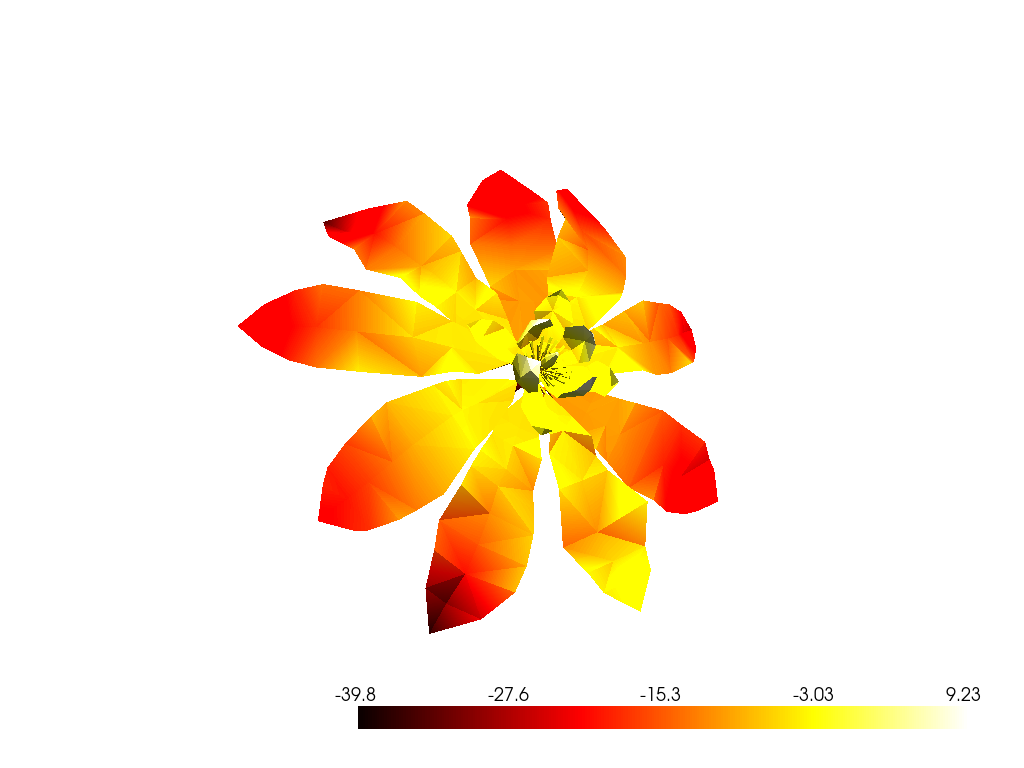

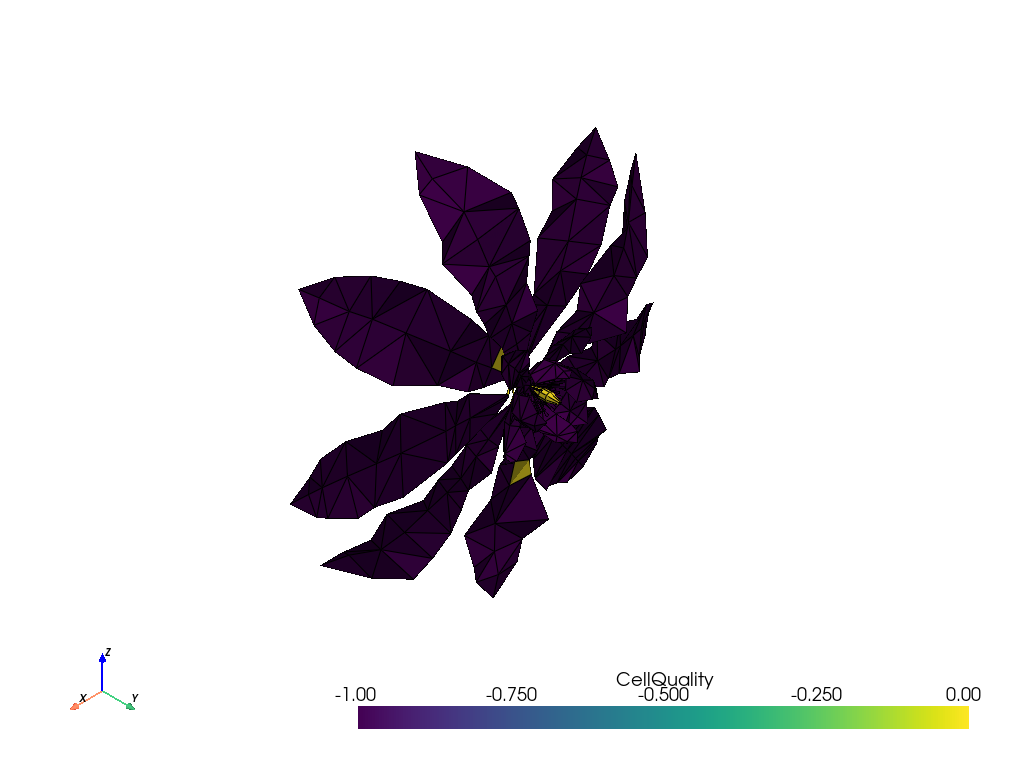

PolyData (0x7f0c96a9eaa0)
  N Cells:    1247
  N Points:   806
  N Strips:   0
  X Bounds:   -7.802e+01, 8.396e+01
  Y Bounds:   -3.981e+01, 9.232e+00
  Z Bounds:   -7.767e+01, 7.742e+01
  N Arrays:   5

In [ ]:
import pyvista as pv

mesh = pv.read("/content/drive/MyDrive/Object3D/magnolia.obj")

plotter = pv.Plotter()
plotter.add_mesh(mesh.rotate_x(50), scalars=mesh.points[:,1], cmap="hot")

light = pv.Light(position=(0, 1, 0), light_type='scene light')
light.set_direction_angle(100, -30)
plotter.add_light(light)

plotter.show()

cqual = mesh.compute_cell_quality('shear_and_size')
cqual.plot(show_edges=True)
cqual

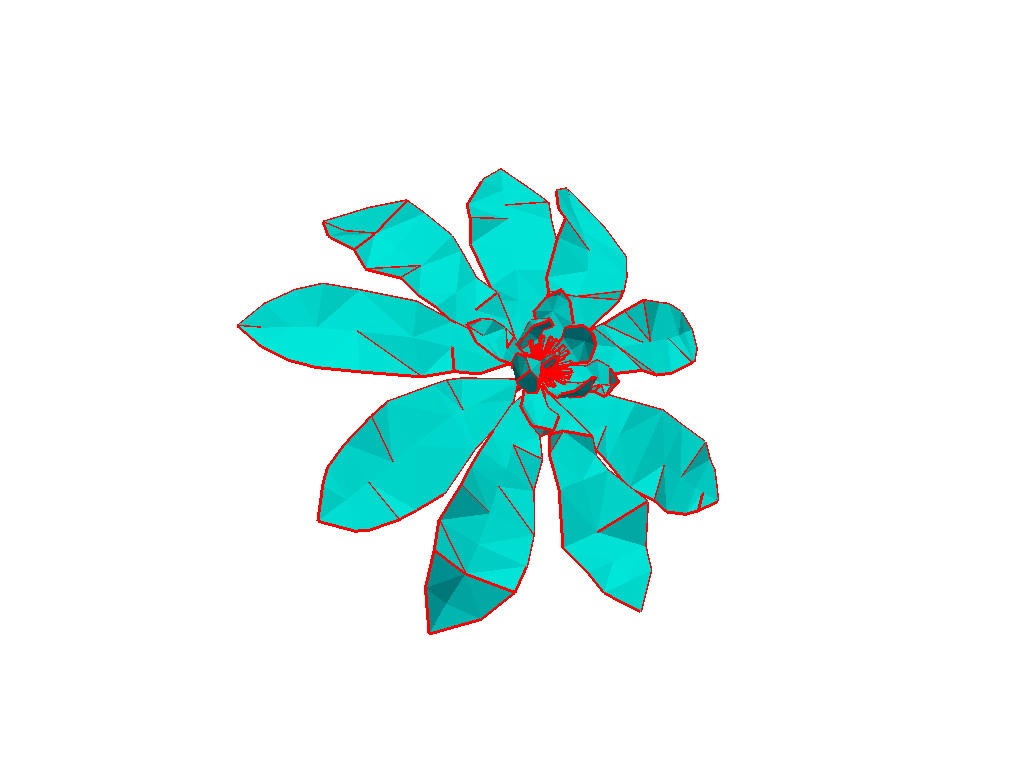

In [ ]:
import pyvista as pv

mesh = pv.read("/content/drive/MyDrive/Object3D/magnolia.obj")

edges = mesh.extract_feature_edges(30)

p = pv.Plotter()
p.add_mesh(mesh.rotate_x(50), color="cyan")

p.add_mesh(edges.rotate_x(50), color="red", line_width=3)

p.show()


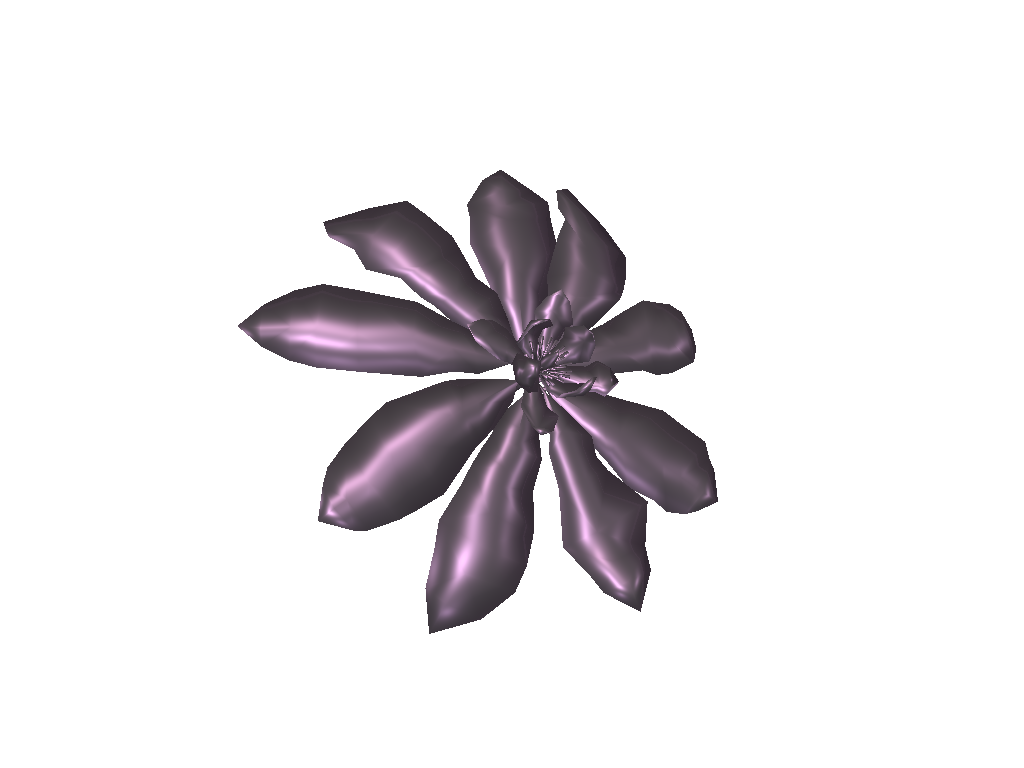

In [ ]:
import pyvista as pv

# Tạo đối tượng Plotter
p = pv.Plotter()

# Đọc đối tượng mesh
mesh = pv.read("/content/drive/MyDrive/Object3D/magnolia.obj")

# Cấu hình ánh sáng của camera
camera_light = pv.Light(light_type='camera light')
p.add_light(camera_light)

p.add_mesh(mesh.rotate_x(50), color='violet', pbr=True, metallic=0.7, roughness=0.5, diffuse=1)

p.show()
# Cấu hình vị trí camera
# cpos = [(-313.40, 66.09, 1000.61), (0.0, 0.0, 0.0), (0.018, 0.99, -0.06)]

# Hiển thị đối tượng
# p.show(cpos=cpos)
